Julián Maya - jamaya@usfq.edu.ec
USFQ

In [214]:
#! pip install xlrd

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("Paired")
#!pip install pandas==1.3.5
plt.rcParams['figure.dpi'] = 300
pd.set_option('display.max_columns', None)
import numpy as np

import plotly.graph_objects as go

import xlrd
import datetime

In [215]:
# Asegurate que tienes la versión 1.3.5 de pandas, sino instala esa versión
pd.__version__

'1.3.5'

In [216]:
# Descargate el repositorio de github en Colab 
def is_running_in_colab():
    try:
        import google.colab
        return True
    except:
        return False
if is_running_in_colab():
    !rm -rf investigacion_senescyt
    !git clone https://github.com/mayait/investigacion_senescyt.git
    !mv /content/investigacion_senescyt/pickles_partes .

In [217]:
# Funcion que une los archivos pickle en un solo dataframe
def unir_pickle(nombre, n):
    lista_dataframes = []
    for i in range(n):
        df = pd.read_pickle(nombre + str(i) + '.pkl')
        lista_dataframes.append(df)
    df_unido = pd.concat(lista_dataframes, ignore_index=True)
    return df_unido

In [218]:
# Importa postrulaciones desde los pickles
inscritos = unir_pickle('pickles_partes/inscritos_',7)

## Eliminar

In [219]:
# Eliminar USU_ESTADO porque es constante
inscritos.drop(['USU_ESTADO'], axis=1, inplace=True)

In [220]:
# Eliminar 'INS_FECHA', 'ENC_FECHA_UPLOAD_ENCUESTA', 'ENC_FECHA_IMPRIME', 'ENC_FECHA_FINALIZA_INSCRIPCION' porque no tienen datos
inscritos.drop(['INS_FECHA', 'ENC_FECHA_UPLOAD_ENCUESTA', 'ENC_FECHA_IMPRIME', 'ENC_FECHA_FINALIZA_INSCRIPCION'], axis=1, inplace=True)

In [221]:
inscritos.shape

(1393510, 33)

In [222]:
inscritos.sample(20)

,Unnamed: 0,USU_FECHAREGISTRO,USU_ESTADO_CIVIL,USU_FECHA_NAC,INS_SEXO,INS_ID,INS_ESTADO,INS_PASO,INS_FECHA_ACONDICIONES,INS_TIPO_INSCRIPCION,COD_PAIS_RESIDE,PAIS_RES,COD_PROVINCIA_RESIDE,PROVINCIA_RESIDE,COD_CANTON_RESIDE,CANTON_RESIDE,COD_PARROQUIA_RESIDE,PARROQUIA_RESIDE,INS_AUTOIDENTIFICACION,ENC_ETERMINADA,cod_final,archivo,PER_ID,USU_NACIONALIDAD,USU_NACIONALIDAD_EXTRANJERA,IAS_OTRA_DISCAPACIDAD,INS_TIPO,CARGA_ENCUESTA,FINALIZA_INSCRIPCION,OTRA_DISCAPACIDAD,TITULO_HOMOLOGADO,INTERNET_DOMICILIO,COMPUTADORA_DOMICILIO
35863,251042,2/5/2019 7:21:48,S,14/6/2000 0:00:00,MUJER,7382670.0,TERMINADO,5,2/5/2019 7:23:16,1,1.0,ECUADOR,19.0,ZAMORA CHINCHIPE,1902.0,CHINCHIPE,190250.0,ZUMBA,MESTIZO,TERMINADA,2255711938,insritos_per18.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048380,103860,12/12/2011,S,17/09/1995,MUJER,NaN,TERMINADO,5,04/12/2019,1,1.0,ECUADOR,17.0,PICHINCHA,1701.0,DISTRITO METROPOLITANO DE QUITO,170105.0,COMITÉ DEL PUEBLO,MESTIZO,True,1476530983,insritos_per19.csv,19.0,ECUATORIANA,1.0,0.0,I,EFA_CARGADA,EFA Y REGISTRO COMPLETO,NaN,NaN,NaN,NaN
420998,159967,28/4/2019 8:33:25,S,3/1/2001 0:00:00,HOMBRE,7194956.0,TERMINADO,5,28/4/2019 9:33:42,1,1.0,ECUADOR,15.0,NAPO,1503.0,ARCHIDONA,150350.0,ARCHIDONA,MESTIZO,TERMINADA,2243761574,insritos_per18.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
867222,229264,11/05/2018,S,11/02/1999,MUJER,NaN,TERMINADO,5,09/12/2019,1,1.0,ECUADOR,18.0,TUNGURAHUA,1801.0,AMBATO,180165.0,SANTA ROSA,MONTUBIO,True,1944751356,insritos_per19.csv,19.0,ECUATORIANA,1.0,0.0,I,EFA_CARGADA,EFA Y REGISTRO COMPLETO,NaN,NaN,NaN,NaN
944832,173188,04/05/2018 18:42,S,06/12/2000 0:00,MUJER,10363448.0,TERMINADO,5,15/01/2021 20:22,1,1,ECUADOR,11.0,LOJA,1101.0,LOJA,110104.0,VALLE,Mestizo/a,TERMINADA,1862011156,insritos_per21.csv,21.0,ECUATORIANA,1,0,I,SI,EFA Y REGISTRO COMPLETO,NO,NO,SI,SI
1102001,169886,14/1/2021 23:43:44,S,31/12/2002 0:00:00,MUJER,11464448.0,TERMINADO,5,7/7/2021 15:16:42,1,1.0,ECUADOR,13.0,MANABI,1303.0,CHONE,130357.0,SAN ANTONIO,Mestizo/a,TERMINADA,2577251338,insritos_per22.csv,22.0,ECUATORIANA,1,0.0,I,SI,EFA Y REGISTRO COMPLETO,NO,NO,SI,SI
1077218,305726,03/01/2017,S,20/09/1999,MUJER,NaN,TERMINADO,5,03/12/2019,1,1.0,ECUADOR,24.0,SANTA ELENA,2401.0,SANTA ELENA,240102.0,SANTA ELENA,MESTIZO,True,1394742474,insritos_per19.csv,19.0,ECUATORIANA,1.0,0.0,I,EFA_CARGADA,EFA Y REGISTRO COMPLETO,NaN,NaN,NaN,NaN
210597,80670,22/11/2017 21:12:11,S,12/7/1998 0:00:00,HOMBRE,7027875.0,INCOMPLETO,1,25/4/2019 1:17:15,1,1.0,ECUADOR,9.0,GUAYAS,901.0,GUAYAQUIL,90112.0,TARQUI,NaN,NaN,1646820929,insritos_per18.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150167,217023,16/01/2021 10:18,S,19/07/2001 0:00,HOMBRE,10410878.0,TERMINADO,5,16/01/2021 10:18,1,1,ECUADOR,13.0,MANABI,1308.0,MANTA,130804.0,TARQUI,Mestizo/a,TERMINADA,2634531301,insritos_per21.csv,21.0,ECUATORIANA,1,0,I,SI,EFA Y REGISTRO COMPLETO,NO,NO,SI,NO
1194604,1169,25/4/2019 9:31:41,S,20/1/2002 0:00:00,HOMBRE,7047312.0,TERMINADO,5,25/4/2019 10:01:38,1,1.0,ECUADOR,1.0,AZUAY,101.0,CUENCA,10101.0,BELLAVISTA,MESTIZO,TERMINADA,2187290101,insritos_per18.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Limpiar fechas
- Existen fechas en formato excel WTF!, por ejemplo 44040.82719, para excel la computación empieza en 1990
- Existen fechas en formato 26/4/2019 4:11:49

In [223]:
def excel_date(text):
    # Convierte un texto con formato de fecha de excel a texto por ejemplo 44040.82719
    return xlrd.xldate_as_datetime(float(text),0).strftime('%d/%m/%Y %H:%M:%S')

def limpiar_fecha_excel(columna):
    # Convierte todas las fechas en formato excel a texto
    # Utiliza la función str.extract() de Pandas para filtrar el DataFrame por todas las filas que contienen la cadena de caracteres definida por el patrón y extrae los valores de los grupos de coincidencia
    criterio = ((inscritos[columna].str.contains(r'^\d{5}\.\d+$', regex=True, na=True )) # Buscar todos los registros que tienen 5 digitos y un punto y un digito
                &
                (inscritos[columna]).notna() # Buscar todos los registros que no son NAN
                ) 
    print(columna, 'Limpiando fecha excel: ',inscritos[criterio].shape[0])
    inscritos[columna] = inscritos[criterio][columna].apply(excel_date)

def limpieza_fecha_null(columna):
    # Ver registros donde len de USU_FECHAREGISTRO es  6
    # Al parecer tiene fecha #NULL!
    print(columna, 'Limpiando #NULL!: ', inscritos[inscritos[columna] == '#NULL!'].shape[0])
    inscritos[columna] = inscritos[columna].replace('#NULL!', np.nan)

    print(columna, 'Limpiando vacios: ', inscritos[inscritos[columna] == ''].shape[0])
    inscritos[columna] = inscritos[columna].replace('', np.nan)

def limpieza_quitar_hora(columna):
    # Quitar la hora de la fecha
    inscritos[columna] = inscritos[columna].str.split(' ').str[0]

def convertir_a_fecha(columna):
    # si inscritos[columna] es una fecha, no hace nada
    if inscritos[columna].dtype == 'datetime64[ns]':
        return
    
    # Limpieza total
    limpiar_fecha_excel(columna)
    limpieza_fecha_null(columna)
    limpieza_quitar_hora(columna)
    # Convertir a fecha
    inscritos[columna] = pd.to_datetime(inscritos[columna], format='%d/%m/%Y')
    # Crear columna con el año
    inscritos[columna + '_ANO'] = inscritos[columna].dt.year
    # Imprimir la cantidad de registros vacios
    print(columna, 'Vacios: ', inscritos[inscritos[columna].isna()].shape[0])

In [224]:
# Limpiar y convertir a fechas
convertir_a_fecha('USU_FECHAREGISTRO')
convertir_a_fecha('USU_FECHA_NAC')

# Calcular la edad de los inscritos a partir de la fecha de nacimiento hasta la fecha de registro en años con decimales
inscritos['USU_EDAD'] = (inscritos['USU_FECHAREGISTRO'] - inscritos['USU_FECHA_NAC']) / np.timedelta64(1, 'Y')
# si la edad es 0 poner NaN
inscritos['USU_EDAD'] = inscritos['USU_EDAD'].apply(lambda x: np.nan if x <= 0 else x)

USU_FECHAREGISTRO Limpiando fecha excel:  213979
USU_FECHAREGISTRO Limpiando #NULL!:  0
USU_FECHAREGISTRO Limpiando vacios:  0
USU_FECHAREGISTRO Vacios:  1179531
USU_FECHA_NAC Limpiando fecha excel:  213882
USU_FECHA_NAC Limpiando #NULL!:  0
USU_FECHA_NAC Limpiando vacios:  0
USU_FECHA_NAC Vacios:  1179628


In [235]:
# Cuantos registros vacios hay en USU_FECHAREGISTRO como porcentaje del total
print('Vacios USU_EDAD: ', inscritos[inscritos['USU_EDAD'].isna()].shape[0] / inscritos.shape[0] * 100, '%')


Vacios USU_EDAD:  93.8438188459358 %


<AxesSubplot: >

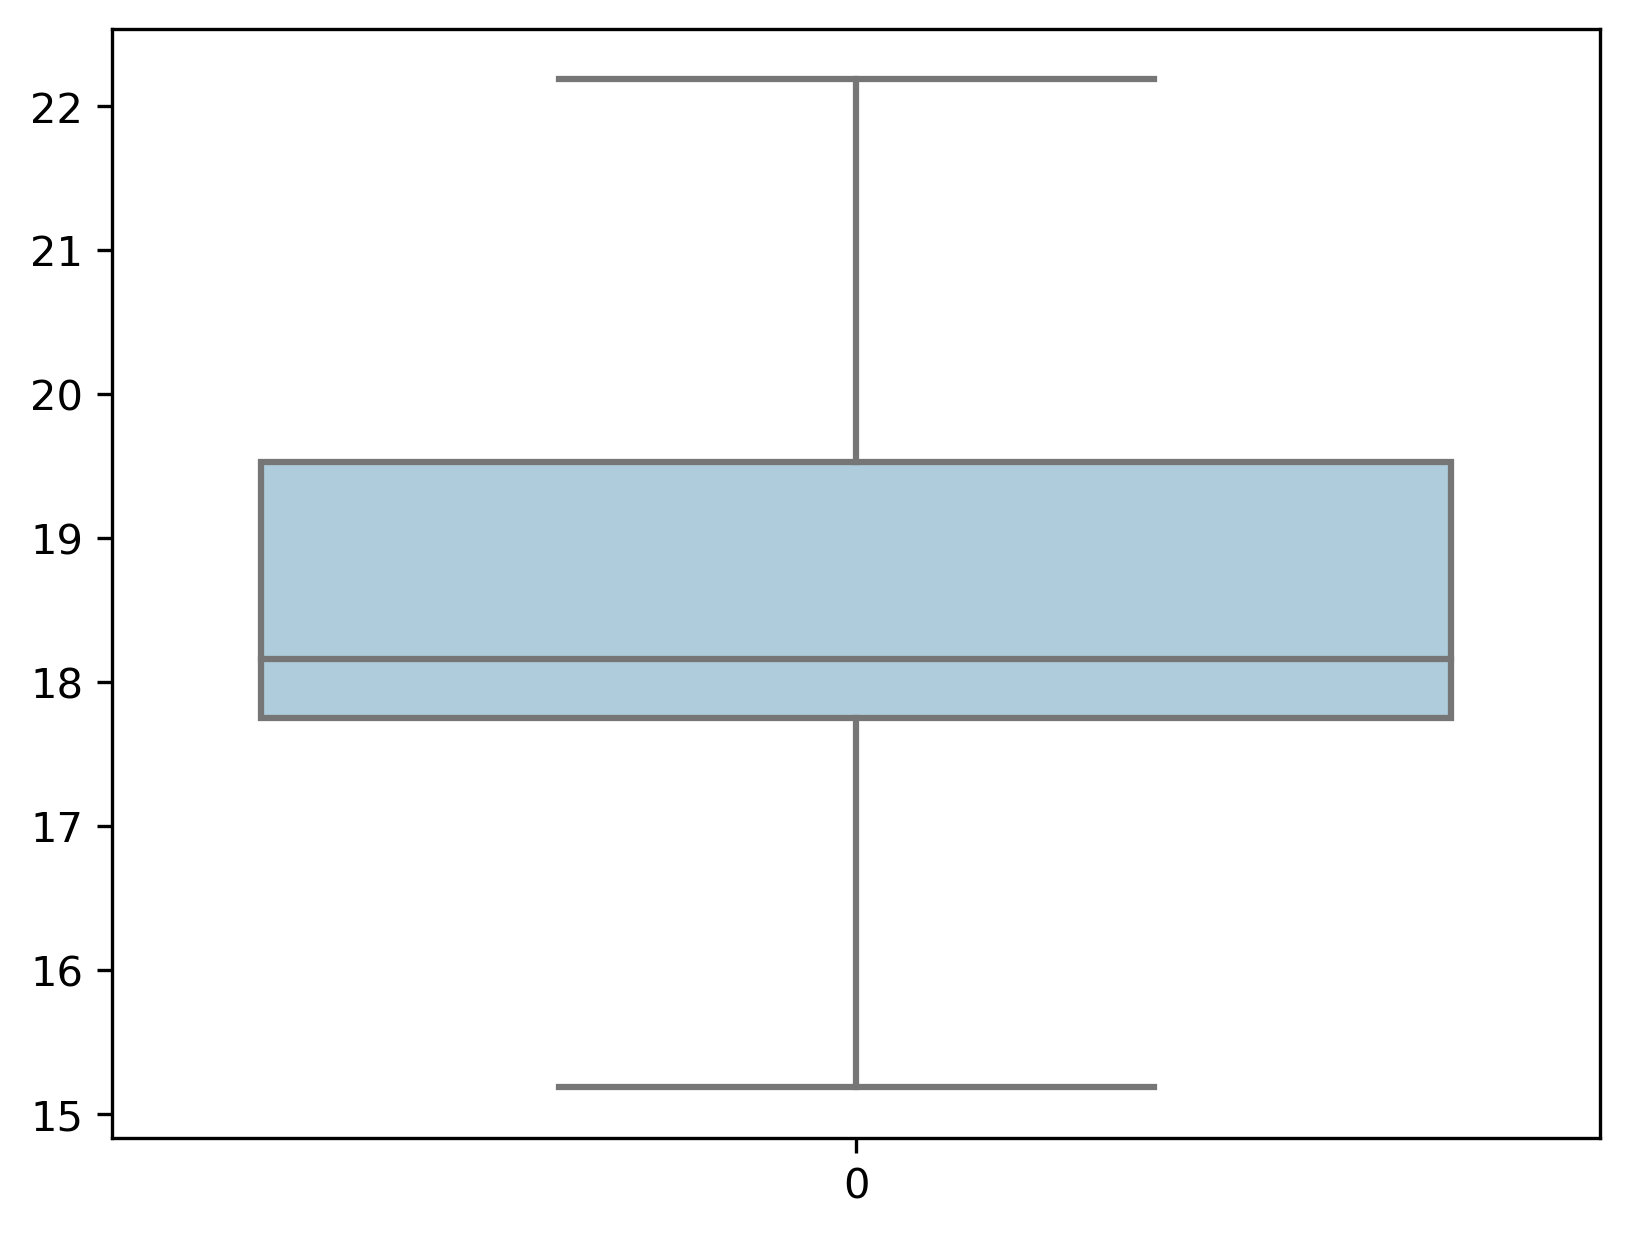

In [225]:
# Grafica un boxplot de la edad de los inscritos sin los outliers
sns.boxplot(inscritos['USU_EDAD'], showfliers=False)


In [226]:
# Calcula el limite superior de los outliers
q1 = inscritos['USU_EDAD'].quantile(0.25)
q3 = inscritos['USU_EDAD'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr
print('Limite superior: ', limite_superior)

# Calcula el limite inferior de los outliers
limite_inferior = q1 - 1.5 * iqr
print('Limite inferior: ', limite_inferior)


# Cuantos tienen más del limite superior de los outliers

print('Cantidad de registros con edad mayor a', limite_superior, ':', inscritos[inscritos['USU_EDAD'] > limite_superior].shape[0])
# que porcentaje es
print('Porcentaje de registros con edad mayor a', limite_superior, ':', inscritos[inscritos['USU_EDAD'] > limite_superior].shape[0] / inscritos.shape[0] * 100)


Limite superior:  22.185260477627878
Limite inferior:  15.088605515513665
Cantidad de registros con edad mayor a 22.185260477627878 : 16142
Porcentaje de registros con edad mayor a 22.185260477627878 : 1.1583698717626714


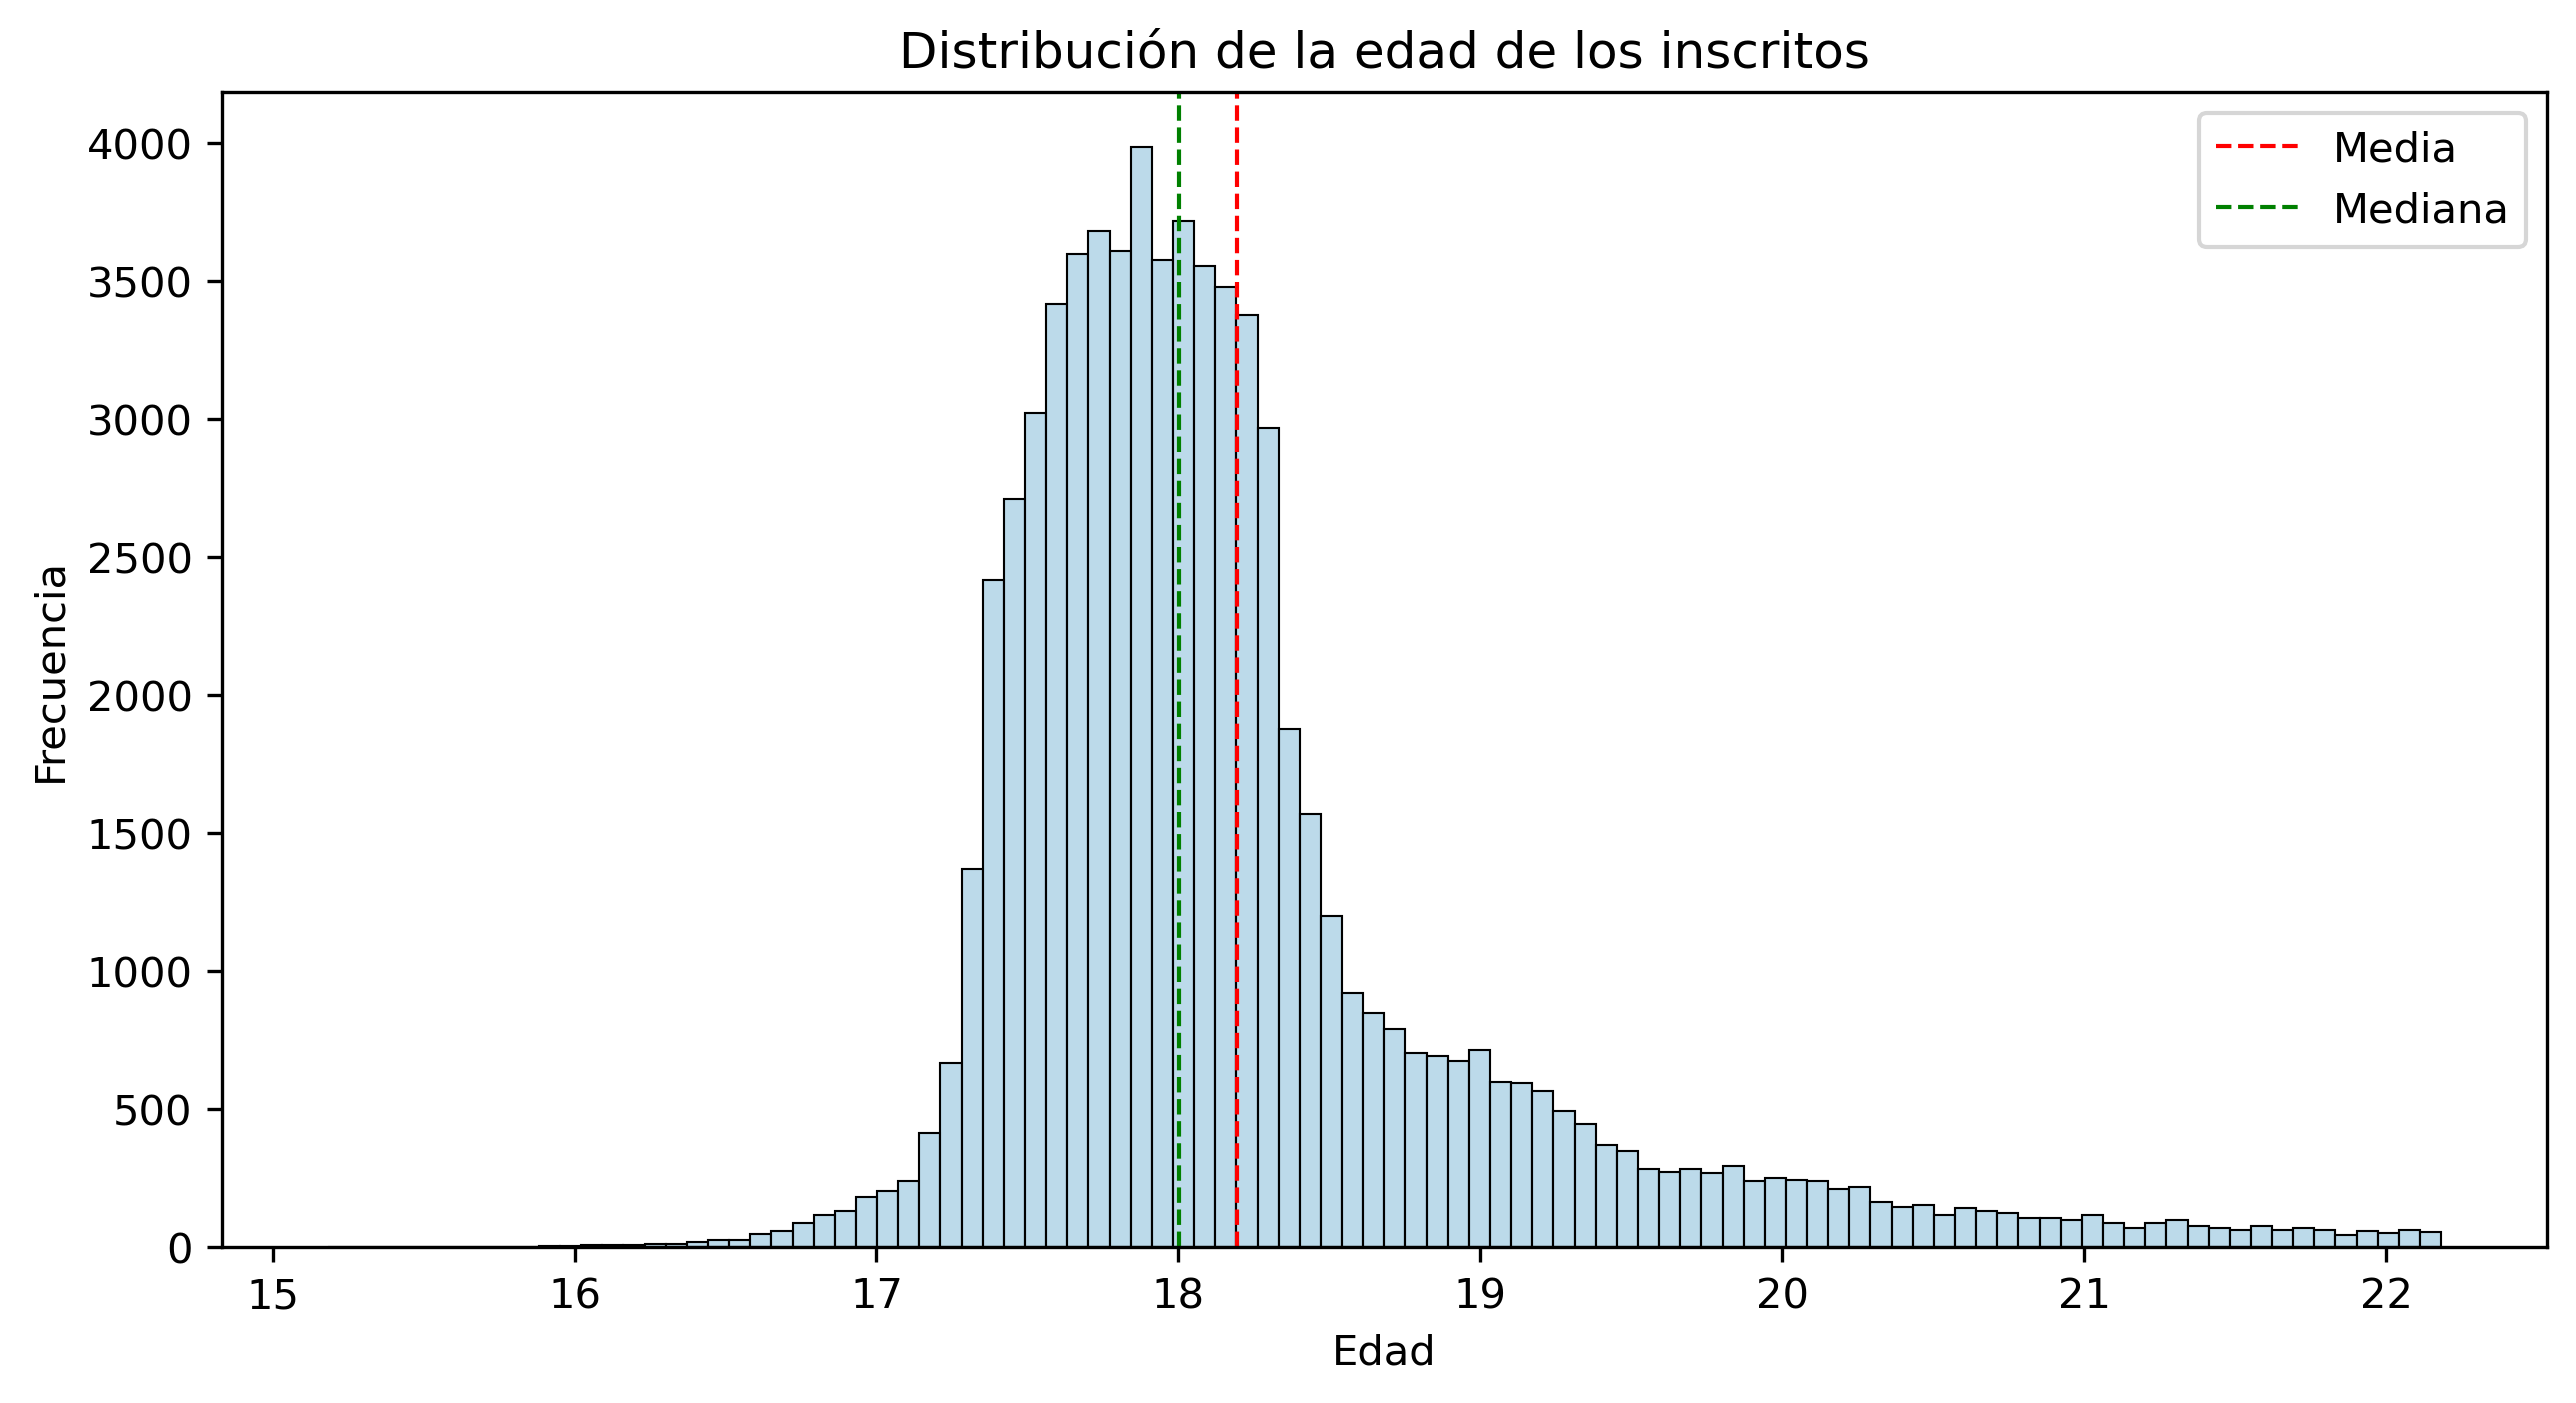

In [227]:
criterio = (inscritos['USU_EDAD'] > limite_inferior) & (inscritos['USU_EDAD'] < limite_superior)
# Graficar la distribución de la edad
plt.figure(figsize=(10,5))
sns.histplot(inscritos[criterio]['USU_EDAD'] , bins=100)
plt.title('Distribución de la edad de los inscritos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# dibuja la media y mediana
plt.axvline(inscritos[criterio]['USU_EDAD'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(inscritos[criterio]['USU_EDAD'].median(), color='g', linestyle='dashed', linewidth=1)
plt.legend({'Media':inscritos[criterio]['USU_EDAD'].mean(),'Mediana':inscritos[criterio]['USU_EDAD'].median()})
plt.show()


In [228]:
inscritos.sample(10)

,Unnamed: 0,USU_FECHAREGISTRO,USU_ESTADO_CIVIL,USU_FECHA_NAC,INS_SEXO,INS_ID,INS_ESTADO,INS_PASO,INS_FECHA_ACONDICIONES,INS_TIPO_INSCRIPCION,COD_PAIS_RESIDE,PAIS_RES,COD_PROVINCIA_RESIDE,PROVINCIA_RESIDE,COD_CANTON_RESIDE,CANTON_RESIDE,COD_PARROQUIA_RESIDE,PARROQUIA_RESIDE,INS_AUTOIDENTIFICACION,ENC_ETERMINADA,cod_final,archivo,PER_ID,USU_NACIONALIDAD,USU_NACIONALIDAD_EXTRANJERA,IAS_OTRA_DISCAPACIDAD,INS_TIPO,CARGA_ENCUESTA,FINALIZA_INSCRIPCION,OTRA_DISCAPACIDAD,TITULO_HOMOLOGADO,INTERNET_DOMICILIO,COMPUTADORA_DOMICILIO,USU_FECHAREGISTRO_ANO,USU_FECHA_NAC_ANO,USU_EDAD
188889,142693,2020-07-31,S,1986-11-12,HOMBRE,NaN,TERMINADO,5,44043.49243,1,1.0,ECUADOR,9.0,GUAYAS,901.0,GUAYAQUIL,90109.0,ROCA,Mestizo/a,TERMINADA,2526641783,insritos_per20.csv,20.0,ECUATORIANA,1.0,0.0,I,SI,EFA Y REGISTRO COMPLETO,NO,NO,SI,SI,2020.0,1986.0,33.717325
1316644,278877,NaT,S,NaT,MUJER,11583610.0,TERMINADO,5,7/7/2021 20:59:46,1,1.0,ECUADOR,21.0,SUCUMBIOS,2102.0,GONZALO PIZARRO,210250.0,LUMBAQUI,Mestizo/a,TERMINADA,1163412192,insritos_per22.csv,22.0,ECUATORIANA,1,0.0,I,SI,EFA Y REGISTRO COMPLETO,NO,NO,SI,SI,NaN,NaN,NaN
1320097,13023,NaT,C,NaT,MUJER,10387595.0,TERMINADO,5,15/01/2021 22:53,1,1,ECUADOR,5.0,COTOPAXI,501.0,LATACUNGA,50102.0,IGNACIO FLORES (PARQUE FLORES),Mestizo/a,TERMINADA,1787220492,insritos_per21.csv,21.0,ECUATORIANA,1,0,I,SI,EFA Y REGISTRO COMPLETO,NO,NO,SI,SI,NaN,NaN,NaN
282655,8504,NaT,S,NaT,HOMBRE,11498754.0,TERMINADO,5,7/7/2021 16:46:29,1,1.0,ECUADOR,6.0,CHIMBORAZO,605.0,CHUNCHI,60550.0,CHUNCHI,Mestizo/a,TERMINADA,6471940110,insritos_per22.csv,22.0,ECUATORIANA,1,0.0,I,SI,EFA Y REGISTRO COMPLETO,NO,NO,SI,SI,NaN,NaN,NaN
629658,227077,NaT,S,NaT,HOMBRE,7206189.0,TERMINADO,5,28/4/2019 15:31:33,1,1.0,ECUADOR,17.0,PICHINCHA,1701.0,DISTRITO METROPOLITANO DE QUITO,170116.0,LA ARGELIA,MESTIZO,TERMINADA,2246891729,insritos_per18.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523745,12599,NaT,S,NaT,MUJER,10159907.0,TERMINADO,5,15/01/2021 6:47,1,1,ECUADOR,1.0,AZUAY,101.0,CUENCA,10156.0,LLACAO,Mestizo/a,TERMINADA,1936380301,insritos_per21.csv,21.0,ECUATORIANA,1,0,I,SI,EFA Y REGISTRO COMPLETO,NO,NO,SI,SI,NaN,NaN,NaN
712212,228383,NaT,S,NaT,MUJER,11737458.0,TERMINADO,5,8/7/2021 19:49:36,1,1.0,ECUADOR,17.0,PICHINCHA,1705.0,RUMIÑAHUI,170551.0,COTOGCHOA,Mestizo/a,TERMINADA,2519901774,insritos_per22.csv,22.0,ECUATORIANA,1,0.0,I,SI,EFA Y REGISTRO COMPLETO,NO,NO,SI,SI,NaN,NaN,NaN
1057405,167035,NaT,S,NaT,MUJER,NaN,TERMINADO,5,04/12/2019,1,1.0,ECUADOR,9.0,GUAYAS,901.0,GUAYAQUIL,90105.0,GARCÍA MORENO,MESTIZO,True,2277220956,insritos_per19.csv,19.0,ECUATORIANA,1.0,0.0,I,EFA_CARGADA,EFA Y REGISTRO COMPLETO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280766,304602,NaT,S,NaT,HOMBRE,NaN,TERMINADO,5,05/12/2019,1,1.0,ECUADOR,24.0,SANTA ELENA,2401.0,SANTA ELENA,240102.0,SANTA ELENA,MESTIZO,True,2418702483,insritos_per19.csv,19.0,ECUATORIANA,1.0,0.0,I,EFA_CARGADA,EFA Y REGISTRO COMPLETO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252694,140548,NaT,S,NaT,HOMBRE,NaN,TERMINADO,5,10/12/2019,1,1.0,ECUADOR,13.0,MANABI,1304.0,EL CARMEN,130401.0,EL CARMEN,MESTIZO,True,2315000910,insritos_per19.csv,19.0,ECUATORIANA,1.0,0.0,I,EFA_CARGADA,EFA Y REGISTRO COMPLETO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
